### 1. Import and Install Dependencies

In [167]:
%pip install opencv-python mediapipe sklearn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [168]:
import cv2 
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np
import os

### 2. Kypoints using MP Holistic

In [169]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [170]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR
    return image, results

In [171]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [172]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1),
                              )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2),)
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2),)
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2),)

In [173]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [174]:
cap = cv2.VideoCapture(1)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(image=frame, model=holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow("OpenCV Feed", image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # close the webcam
    cap.release()

    # close the window
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


KeyboardInterrupt: 

In [ ]:
draw_landmarks(image, results)

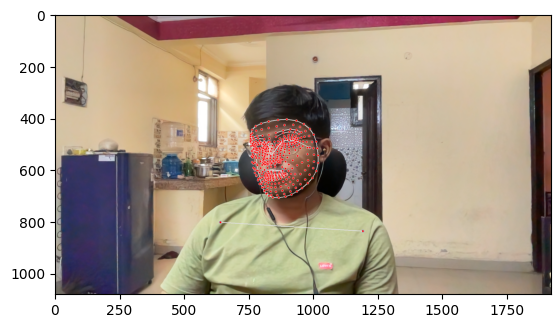

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### 3. Extract Keypoint Values

In [ ]:
results.pose_landmarks

landmark {
  x: 0.4340377748012543
  y: 0.5070098042488098
  z: -0.4615951478481293
  visibility: 0.9999210238456726
}
landmark {
  x: 0.458098441362381
  y: 0.4532023072242737
  z: -0.4631309509277344
  visibility: 0.9998027682304382
}
landmark {
  x: 0.4711242914199829
  y: 0.4518013596534729
  z: -0.4628060460090637
  visibility: 0.9998266100883484
}
landmark {
  x: 0.48380306363105774
  y: 0.45096373558044434
  z: -0.46290692687034607
  visibility: 0.9997965097427368
}
landmark {
  x: 0.4295690655708313
  y: 0.45736414194107056
  z: -0.43121472001075745
  visibility: 0.9998239874839783
}
landmark {
  x: 0.42182081937789917
  y: 0.45829299092292786
  z: -0.4306672215461731
  visibility: 0.9998436570167542
}
landmark {
  x: 0.41434481739997864
  y: 0.4598446190357208
  z: -0.43085768818855286
  visibility: 0.9998456835746765
}
landmark {
  x: 0.5126670002937317
  y: 0.47762128710746765
  z: -0.34000906348228455
  visibility: 0.9998222589492798
}
landmark {
  x: 0.4191852807998657
  y

In [ ]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros(33*4)

In [ ]:
pose

array([[ 4.34037775e-01,  5.07009804e-01, -4.61595148e-01,
         9.99921024e-01],
       [ 4.58098441e-01,  4.53202307e-01, -4.63130951e-01,
         9.99802768e-01],
       [ 4.71124291e-01,  4.51801360e-01, -4.62806046e-01,
         9.99826610e-01],
       [ 4.83803064e-01,  4.50963736e-01, -4.62906927e-01,
         9.99796510e-01],
       [ 4.29569066e-01,  4.57364142e-01, -4.31214720e-01,
         9.99823987e-01],
       [ 4.21820819e-01,  4.58292991e-01, -4.30667222e-01,
         9.99843657e-01],
       [ 4.14344817e-01,  4.59844619e-01, -4.30857688e-01,
         9.99845684e-01],
       [ 5.12667000e-01,  4.77621287e-01, -3.40009063e-01,
         9.99822259e-01],
       [ 4.19185281e-01,  4.80510563e-01, -1.80578172e-01,
         9.99891937e-01],
       [ 4.58119690e-01,  5.59576154e-01, -4.09011543e-01,
         9.99915838e-01],
       [ 4.21590298e-01,  5.57280362e-01, -3.62107664e-01,
         9.99930620e-01],
       [ 6.19546235e-01,  7.75382638e-01, -2.35530525e-01,
      

In [ ]:
pose = pose.flatten()

In [ ]:
pose

array([ 4.34037775e-01,  5.07009804e-01, -4.61595148e-01,  9.99921024e-01,
        4.58098441e-01,  4.53202307e-01, -4.63130951e-01,  9.99802768e-01,
        4.71124291e-01,  4.51801360e-01, -4.62806046e-01,  9.99826610e-01,
        4.83803064e-01,  4.50963736e-01, -4.62906927e-01,  9.99796510e-01,
        4.29569066e-01,  4.57364142e-01, -4.31214720e-01,  9.99823987e-01,
        4.21820819e-01,  4.58292991e-01, -4.30667222e-01,  9.99843657e-01,
        4.14344817e-01,  4.59844619e-01, -4.30857688e-01,  9.99845684e-01,
        5.12667000e-01,  4.77621287e-01, -3.40009063e-01,  9.99822259e-01,
        4.19185281e-01,  4.80510563e-01, -1.80578172e-01,  9.99891937e-01,
        4.58119690e-01,  5.59576154e-01, -4.09011543e-01,  9.99915838e-01,
        4.21590298e-01,  5.57280362e-01, -3.62107664e-01,  9.99930620e-01,
        6.19546235e-01,  7.75382638e-01, -2.35530525e-01,  9.99178290e-01,
        3.33136529e-01,  7.43551016e-01, -1.22134097e-01,  9.99813557e-01,
        6.55914545e-01,  

In [ ]:
results.left_hand_landmarks

In [ ]:
results.right_hand_landmarks

In [ ]:
results.face_landmarks

landmark {
  x: 0.43531447649002075
  y: 0.5627968907356262
  z: -0.019389556720852852
}
landmark {
  x: 0.4277934730052948
  y: 0.5271267294883728
  z: -0.030620837584137917
}
landmark {
  x: 0.43382421135902405
  y: 0.5386536717414856
  z: -0.017178751528263092
}
landmark {
  x: 0.42491763830184937
  y: 0.4933393895626068
  z: -0.018738340586423874
}
landmark {
  x: 0.42668282985687256
  y: 0.5160194039344788
  z: -0.032002951949834824
}
landmark {
  x: 0.4274762272834778
  y: 0.5018757581710815
  z: -0.02897528000175953
}
landmark {
  x: 0.4313669204711914
  y: 0.4687085747718811
  z: -0.011670568026602268
}
landmark {
  x: 0.4032128155231476
  y: 0.4783285856246948
  z: 0.028138956055045128
}
landmark {
  x: 0.4315604567527771
  y: 0.4450899362564087
  z: -0.006427573971450329
}
landmark {
  x: 0.4303591251373291
  y: 0.4316401183605194
  z: -0.006664315238595009
}
landmark {
  x: 0.4300307035446167
  y: 0.3840276300907135
  z: 0.0029284884221851826
}
landmark {
  x: 0.435974925756

In [ ]:
pose.shape

(132,)

In [ ]:
if results.right_hand_landmarks:
    print("right_hand_landmarks present")
else:
    print("right_hand_landmarks not present")

right_hand_landmarks not present


In [ ]:
if results.left_hand_landmarks:
    print("left_hand_landmarks present")
else:
    print("left_hand_landmarks not present")

left_hand_landmarks not present


In [ ]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
lh, rh

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
lh.shape, rh.shape

((63,), (63,))

In [ ]:
# len(results.face_landmarks.landmark) # 468 is landmark property is present

In [ ]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [ ]:
face

array([ 0.43531448,  0.56279689, -0.01938956, ...,  0.4858214 ,
        0.44497526, -0.00719248])

In [ ]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)   
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [ ]:
result_test

array([ 0.43403777,  0.5070098 , -0.46159515, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
np.save('test',result_test)

In [ ]:
np.load('test.npy')

array([ 0.43403777,  0.5070098 , -0.46159515, ...,  0.        ,
        0.        ,  0.        ])

### 4. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Changed_Data')
# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1 
## ...
## 29
#thanks
## 0
## 1 
## ...
## 29
# iloveyou
## 0
## 1 
## ...
## 29

In [ ]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(1)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # NEW LOOP
    for action in actions:
        cv2.waitKey(2000)
        cv2.putText(image, f'STARTING COLLECTION of {action}', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
        cv2.waitKey(2000)
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(image=frame, model=holistic)
                print(results)



                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)

                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Show to screen
                cv2.imshow("OpenCV Feed", image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
        

    # close the webcam
    cap.release()

    # close the window
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

### 6. Preprocess Data and Create Labels and Features

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
label_map = {label: num for num, label in enumerate(actions)}

In [ ]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join('MP_Data', action, str(sequence), f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
np.array(sequences).shape

(90, 30, 1662)

In [ ]:
np.array(labels).shape

(90,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(90, 30, 1662)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [ ]:
X_train.shape

(85, 30, 1662)

In [ ]:
X_test.shape

(5, 30, 1662)

In [ ]:
y_train.shape

(85, 3)

In [ ]:
y_test.shape

(5, 3)

### 7. Build and Train LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [177]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) # data should be returned to next layer that's why return_sequences=True
model.add(LSTM(128, return_sequences=True, activation='relu')) # data should be returned to next layer that's why return_sequences=True
model.add(LSTM(64, return_sequences=False, activation='relu')) # next layer is Dense layer so we don't need to return sequences

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
# the model is going to give results like below
res = [0.7, .2, .1]

In [ ]:
actions[np.argmax(res)]

'hello'

In [178]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.7638 - categorical_accuracy: 0.6824
Epoch 2/2000
3/3 [==============================] - 0s 43ms/step - loss: 0.7982 - categorical_accuracy: 0.6353
Epoch 3/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.7749 - categorical_accuracy: 0.6824
Epoch 4/2000
3/3 [==============================] - 0s 44ms/step - loss: 0.7960 - categorical_accuracy: 0.6706
Epoch 5/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.8571 - categorical_accuracy: 0.6824
Epoch 6/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.8450 - categorical_accuracy: 0.7412
Epoch 7/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8405 - categorical_accuracy: 0.6000
Epoch 8/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.8601 - categorical_accuracy: 0.6706
Epoch 9/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.8953 - categorical_accuracy: 0.4824


KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_24 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_25 (LSTM)              (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

### 8. Make Predictions

In [ ]:
res = model.predict(X_test)

1/1 [==============================] - 0s 24ms/step


In [ ]:
actions[np.argmax(res[0])]

'thanks'

In [ ]:
actions[np.argmax(y_test[0])]

'thanks'

In [ ]:
for i in range(len(y_test)):
    print(f'actual: {actions[np.argmax(y_test[i])]}, prediction: {actions[np.argmax(res[i])]}')

actual: thanks, prediction: thanks
actual: iloveyou, prediction: iloveyou
actual: thanks, prediction: thanks
actual: iloveyou, prediction: iloveyou
actual: thanks, prediction: thanks


### 9. Save Weights

In [176]:
model.save('action.h5')

In [ ]:
del model

In [179]:
model.load_weights('action.h5')

In [ ]:
res = model.predict(X_test)
for i in range(len(y_test)):
    print(f'actual: {actions[np.argmax(y_test[i])]}, prediction: {actions[np.argmax(res[i])]}')

1/1 [==============================] - 0s 27ms/step
actual: thanks, prediction: thanks
actual: iloveyou, prediction: iloveyou
actual: thanks, prediction: thanks
actual: iloveyou, prediction: iloveyou
actual: thanks, prediction: thanks


### 10. Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
ytrue

[1, 2, 1, 2, 1]

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]])

In [ ]:
accuracy_score(ytrue, yhat)

1.0

In [ ]:
# test on training data
yhat = model.predict(X_train)
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(multilabel_confusion_matrix(ytrue, yhat))
print(accuracy_score(ytrue, yhat))

3/3 [==============================] - 0s 18ms/step
[[[37 18]
  [ 3 27]]

 [[57  1]
  [ 2 25]]

 [[53  4]
  [18 10]]]
0.7294117647058823


### 11. Test in Real Time

In [186]:
# 1. New detection variables

sequence = []
sentence = []
threshold = 0.7



cap = cv2.VideoCapture(1)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(image=frame, model=holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        # 3. Visualisation logic
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        if len(sentence) > 5:
            sentence = sentence[-5:]
        
        cv2.rectangle(image, (0,0), (640,40), (245,117,16),-1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow("OpenCV Feed", image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # close the webcam
    cap.release()

    # close the window
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
X_test[0].shape

(30, 1662)

In [ ]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 1662)

In [ ]:
# model.predict(X_test[0]) # error
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 31ms/step


array([[0.00641105, 0.8374946 , 0.15609436]], dtype=float32)